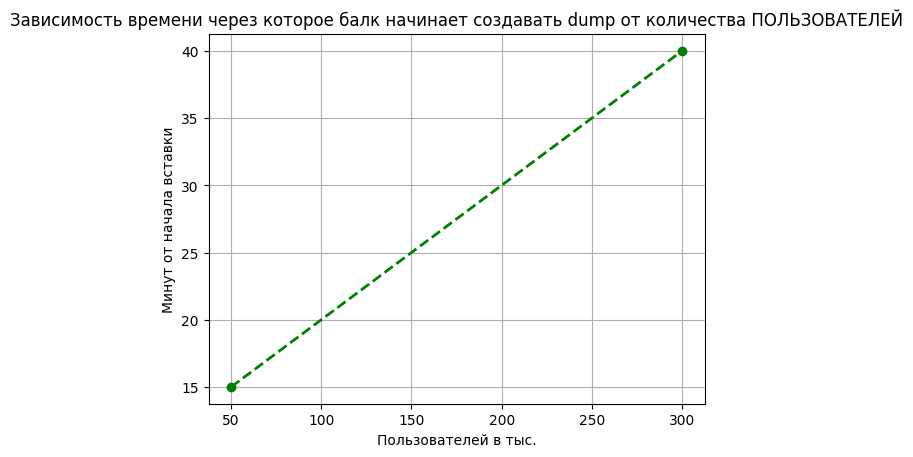

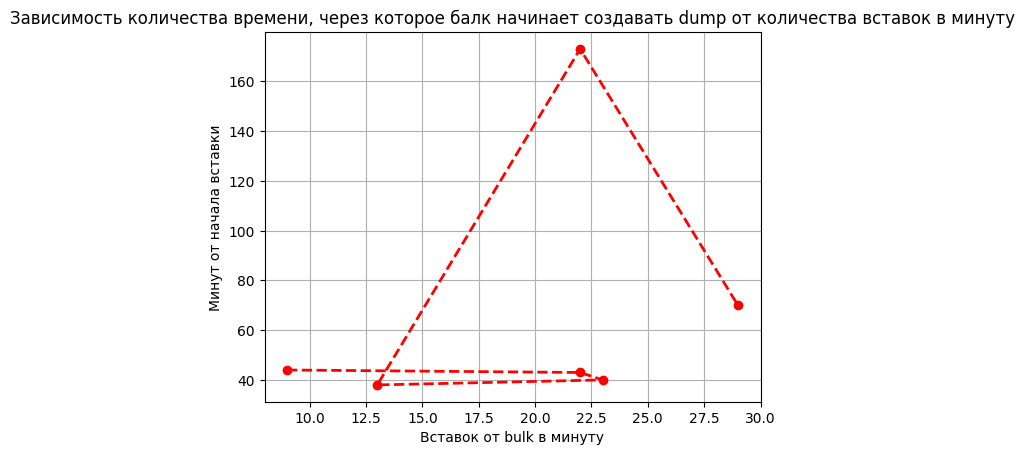

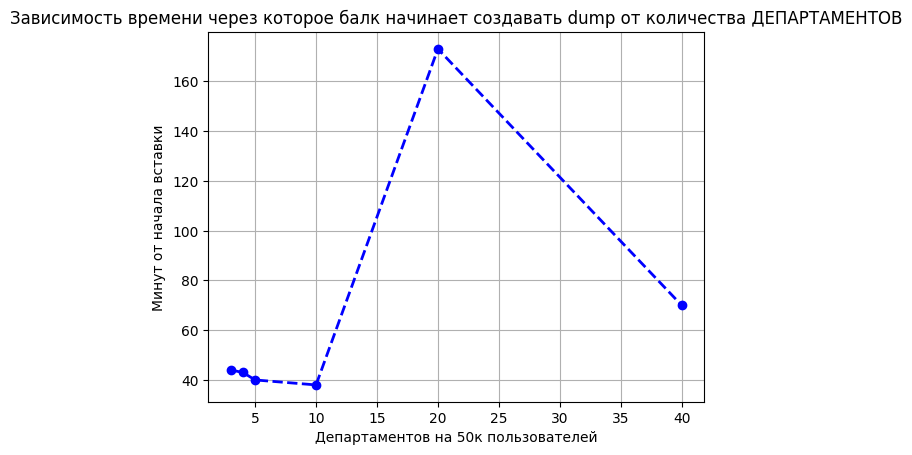

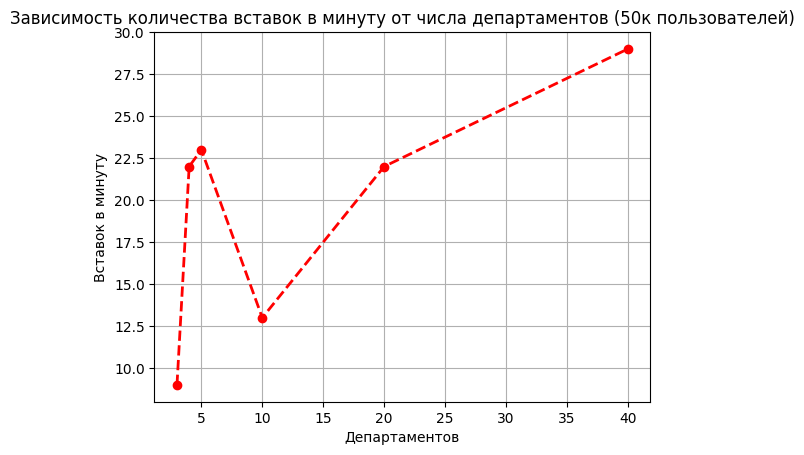

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def data(x, y):
    return np.array(x), np.array(y)

def draw_graph(x, y, xlabel, ylabel, title, color='green'):
    fig, ax = plt.subplots()
    ax.plot(x, y, 
            color=color, 
            marker='o', 
            linestyle='dashed', 
            linewidth=2, 
            markersize=6)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_title(title)
    plt.grid(True)

    offset_x = x[-2] - x[-1]
    offset_y = y[-2] - y[-1]
    # plt.axis([min(x) - offset_x, max(x) + offset_x, min(y) - offset_y, max(y) + offset_y])
    plt.show()


'''
Зависимость времени, через которое балк начинает создавать dump от количества ДЕПАРТАМЕНТОВ
50к пользователей 
'''
def department_dump_time(departs, time_from_start_insertion):
    departs, time_from_start_insertion = data(departs, time_from_start_insertion)
    draw_graph(departs, time_from_start_insertion,
               'Департаментов на 50к пользователей', 
               'Минут от начала вставки', 
               'Зависимость времени через которое балк начинает создавать dump от количества ДЕПАРТАМЕНТОВ',
               'blue')


'''
Зависимость времени, через которое балк начинает создавать dump от количества ПОЛЬЗОВАТЕЛЕЙ
5 департаментов
'''
def users_dump_time(users, time_from_start_insertion):
    users, time_from_start_insertion = data(users, time_from_start_insertion)
    draw_graph(users, time_from_start_insertion,
               'Пользователей в тыс.', 
               'Минут от начала вставки', 
               'Зависимость времени через которое балк начинает создавать dump от количества ПОЛЬЗОВАТЕЛЕЙ',
               'green')


'''
Зависимость количества времени, через которое балк начинает создавать dump от количества вставок в минуту
5 департаментов
'''
def insertion_dump_time(insertions_per_minut, time_from_start_insertion):
    insertions_per_minut, time_from_start_insertion = data(insertions_per_minut, time_from_start_insertion)
    draw_graph(insertions_per_minut, time_from_start_insertion,
               'Вставок от bulk в минуту', 
               'Минут от начала вставки', 
               'Зависимость количества времени, через которое балк начинает создавать dump от количества вставок в минуту',
               'red')

'''
Зависимость количества вставок в минуту от числа департаментов
5 департаментов
'''
def departs_insertion_per_minut(departs, insertions_per_minut_departs):
    departs, insertions_per_minut_departs = data(departs, insertions_per_minut_departs)
    draw_graph(departs, insertions_per_minut_departs,
               'Департаментов', 
               'Вставок в минуту', 
               'Зависимость количества вставок в минуту от числа департаментов (50к пользователей)',
               'red')

users = [50, 300]  #  тыс
departs = [3, 4, 5, 10, 20, 40]

time_departs = [44, 43, 40, 38, 173, 70]  #  время от начала вставки (после окончания подключения) до начала создания dumps (запуски с департаментами)
time_users = [15, 40]  #  время от начала вставки (после окончания подключения) до начала создания dumps (запуски с пользователями)

insertions_per_minut_departs = [9, 22, 23, 13, 22, 29]  # вставки от балка в кликхаус
insertions_per_minut_users = [23, 150]

users_dump_time(users, time_users)
insertion_dump_time(insertions_per_minut_departs, time_departs)
department_dump_time(departs, time_departs)
departs_insertion_per_minut(departs, insertions_per_minut_departs)



In [21]:
'''
40 департаментов, по 1250 пользователей в каждом
один департамент производит за 3 секунды (в проксе стоит flush int 3 сек):
Дмик в логах пишет, что пересылает и по 7500 
'''

(1250 * 6 / 60) * 3 

375.0